In [ ]:
import pandas as pd
import numpy as np
df = pd.read_csv("/content/6 class csv.csv")
data = df.loc[:,'Temperature (K)':'Luminosity(L/Lo)']

data = np.log(data)


data = data.astype("float32")
data = data.to_numpy()
training_data = data
data.shape

(240, 2)


This is importing the data from the csv with all of the information of the stars and turning it into a data set that I can give to the clustering algorythm



In [ ]:


import numpy as np
from matplotlib import pyplot
from sklearn.datasets import make_classification
from sklearn.cluster import AffinityPropagation


model = AffinityPropagation(damping=0.6)


model.fit(training_data)


result = model.predict(training_data)


clusters = unique(result)
for mean_cluster in mean_clusters:

    index = where(mean_result == mean_cluster)

    pyplot.scatter(data[index, 0], data[index, 1])

plt.xscale("log")
plt.yscale("log")

pyplot.show()

ValueError: ignored

This is the code I had for the assignment previously, to my suprise it did not work because I was missing multiple import statements and since when I originally did this, I had those statements, the code worked, but unforntuanatly at the time of writting this, I do not have them so I am going to have to back track

The top image is the output from the original assignment and the bottom is what it was supposed to look like, as you can see, it was not the best and could use a bit of work

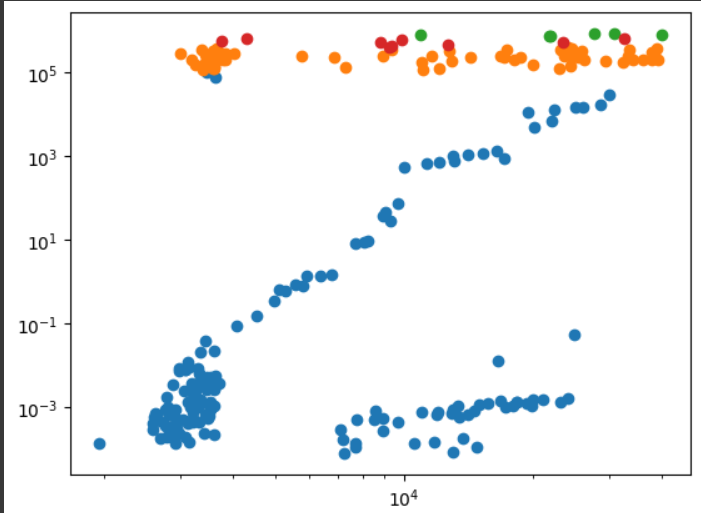
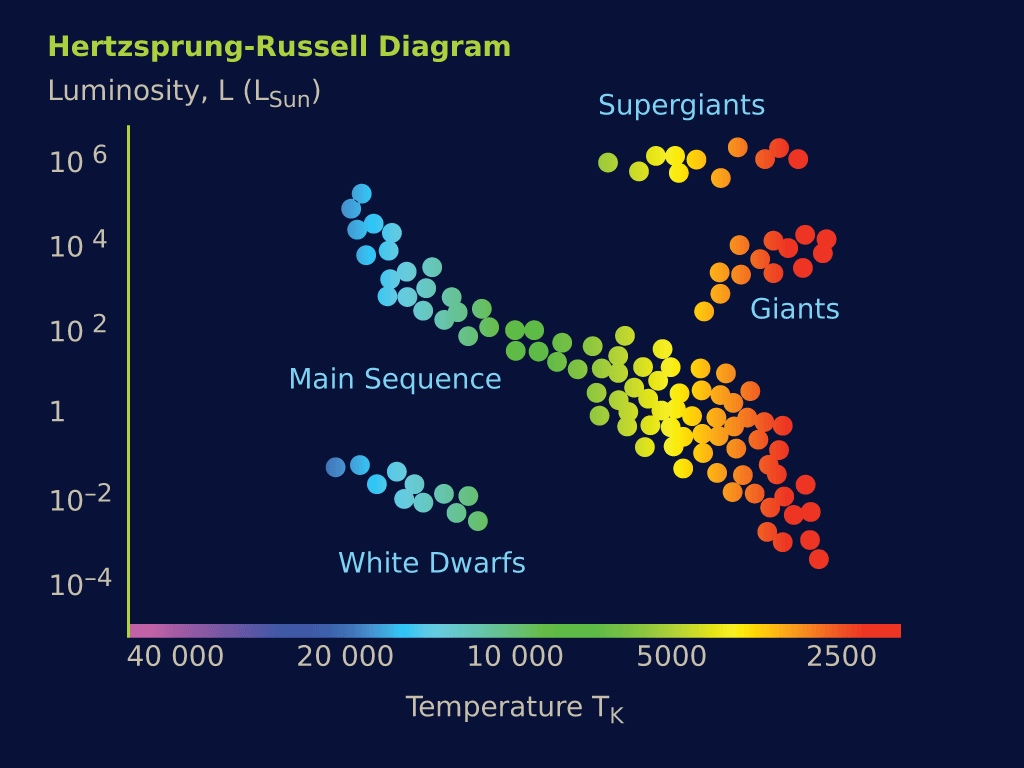

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


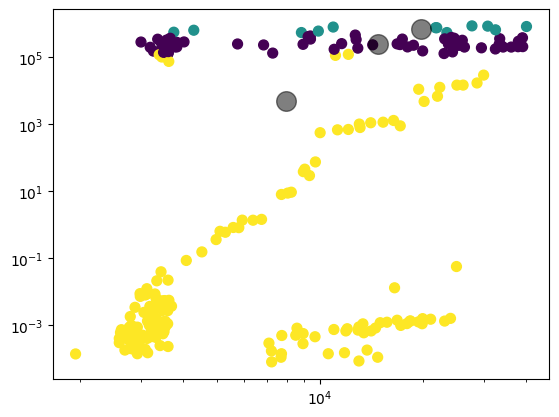

In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


X = training_data

# Perform k-means clustering
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

# Plot the results
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)
plt.xscale("log")
plt.yscale("log")
plt.show()

I asked chat gpt to make a program that is a solution to a clutering problem and this is what it gave me... a pretty much exact copy of my original program, but working, this meant I was heading the correct direction

However the problem with the kmeans algorythm is it does not like logified data and will spit out errors since (according to chatgpt) it relies on the distance between data points and transformations can disrupt those distances and guassianmixture is a better way to do it so that is what I did next

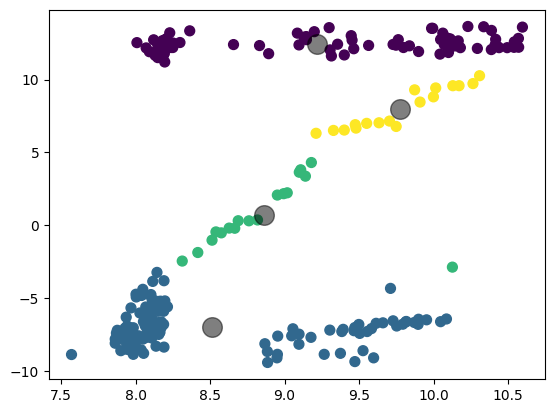

In [ ]:
import pandas as pd
import numpy as np
from sklearn.mixture import GaussianMixture
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt


X = training_data
#imputer = SimpleImputer()
#X_imputed = imputer.fit_transform(X)
#X_log = np.log(X_imputed)

# Perform k-means clustering
gmm = GaussianMixture(n_components=3)
gmm.fit(X)

# Plot the results
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

plt.show()

I kept getting errors about how I could not have NaN values, this was a super simple solution that flew right over my head, I have to use luminosity value instead of absolute magnitude values because absolute magnitude values can be negative, but luminosity values cannot

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


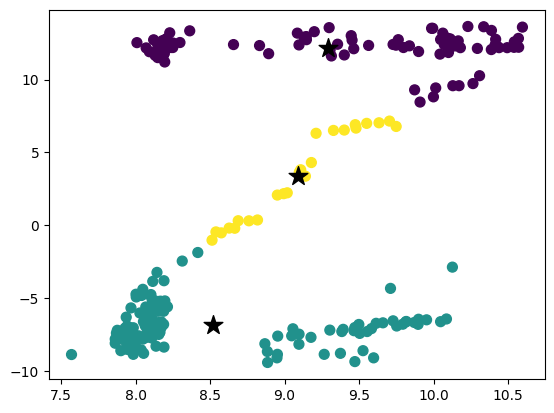

In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


X = training_data


kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='*', s=200, color='black')

plt.show()

now the problem is it is identifying the main sequence set of stars as 3 different types but not differentiating from the white dwarf stars set

after analyzing this entery for a while I had my eureka momement, It does label the correct star pattern in the csv I have, I can just use a test, train split and that will be SOOOOOO much easier

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

data = pd.read_csv('/content/6 class csv.csv')

le = LabelEncoder()
data['Star type'] = le.fit_transform(data['Star type'])
X = data[['Temperature (K)', 'Luminosity(L/Lo)', 'Radius(R/Ro)', 'Absolute magnitude(Mv)']].values
y = data['Star type'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.049, random_state=8)

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

new_star = [[5778, 1, 1, 4.83]]
predicted_type = le.inverse_transform(knn.predict(new_star))
print('Predicted star type:', predicted_type)

Accuracy: 0.9166666666666666
Predicted star type: [3]


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

data = pd.read_csv('/content/6 class csv.csv')

le = LabelEncoder()
data['Star type'] = le.fit_transform(data['Star type'])
X = data[['Temperature (K)', 'Luminosity(L/Lo)', 'Radius(R/Ro)', 'Absolute magnitude(Mv)']].values
y = data['Star type'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=55)

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

new_star = [[5778, 1, 1, 4.83]]
predicted_type = le.inverse_transform(knn.predict(new_star))
print('Predicted star type:', predicted_type)

Accuracy: 0.6666666666666666
Predicted star type: [3]


I finished the program by fiddling with the random state number and test_size until I got a desireable accuracy

In [ ]:
z= 1
top = 0
best_state = 0
best_size = 0
while z!= 100:
  w = 0.05
  while w<=0.5:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=w, random_state=z)

    knn = KNeighborsClassifier(n_neighbors=5)
    knn.fit(X_train, y_train)

    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)

    if top < accuracy:
      top = accuracy
      best_state = z
      best_size = w

    w = w+0.005
  z = z+1

print (best_state,best_size, top)

4 0.065 0.9375


Eventually I decided to brute force it by trying all random_state from 1 - 100 and testing sizes logically and determined that if I test train split with testing only 6.5% of the data I can get a 93% accuracy with the random state 4

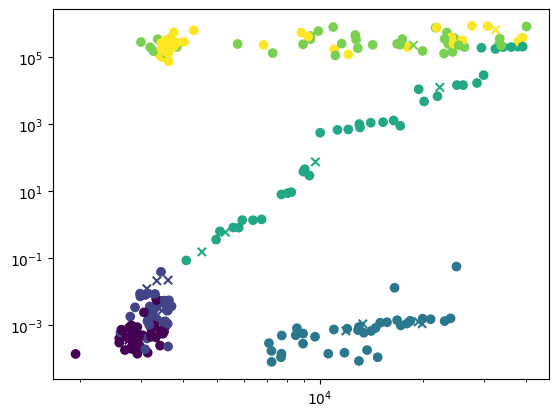

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.065, random_state=4)

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, label='Training')
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, label='Testing', marker='x')

plt.xscale("log")
plt.yscale("log")
plt.show()


finally we graph it and for the most part it is correct, still struggles with the main sequence stars, but it can differentiate between main sequence, super giants, giants and white dwarfs

Special thanks to Dr.Lecky ChatGPT and my earth science/astronomy teacher in 10th grade Mrs.Putnam